In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [21]:
tickers = ['AAPL', 'MSFT', 'AMZN']

prices = yf.download(tickers, start='2018-01-01', end='2025-01-01', progress=False)['Close']  # Descargar datos de precios

returns = prices.pct_change().dropna()  # Calcular rendimientos diarios
cov = returns.cov()  # Matriz de covarianza
mean_returns = returns.mean()  # Rendimientos medios diarios

In [22]:
n_sim = 10000
n = len(tickers)
rf = 0.04/252 # Tasa libre de riesgo diaria

w_rand = np.random.dirichlet(np.ones(n), n_sim) # Esta distribución asegura que la suma de los pesos generados al azar sea 1

p_returns = [np.sum(mean_returns * w) for w in w_rand]  # Rendimiento esperado del portafolio
p_vol = [np.sqrt(w.T @ cov @ w) for w in w_rand]  # Volatilidad del portafolio
p_sharpe = [(np.dot(w,mean_returns) - rf) / np.sqrt(w.T @ cov @ w) for w in w_rand]  # Ratio de Sharpe

In [23]:
ind_max_r = np.argmax(p_returns)  # Índice del portafolio con mayor rendimiento
ind_min_v = np.argmin(p_vol)  # Índice del portafolio con menor volatilidad
ind_max_s = np.argmax(p_sharpe)  # Índice del portafolio con mayor ratio de Sharpe

In [24]:
resultados = pd.DataFrame({
    'Portafolio': ['Mínimo Volatilidad %', 'Máximo Rendimiento %', 'Máximo Sharpe %'],
    'Rendimiento Esperado': [p_returns[ind_min_v] *100, p_returns[ind_max_r] *100, p_returns[ind_max_s] *100],
    'Volatilidad': [p_vol[ind_min_v] *100, p_vol[ind_max_r] *100, p_vol[ind_max_s] *100],
    'Ratio de Sharpe': [p_sharpe[ind_min_v] *100, p_sharpe[ind_max_r] *100, p_sharpe[ind_max_s] *100],
})
resultados

,Portafolio,Rendimiento Esperado,Volatilidad,Ratio de Sharpe
0,Mínimo Volatilidad %,0.112985,1.718917,5.649614
1,Máximo Rendimiento %,0.121994,1.922991,5.518560
2,Máximo Sharpe %,0.117380,1.751003,5.797054


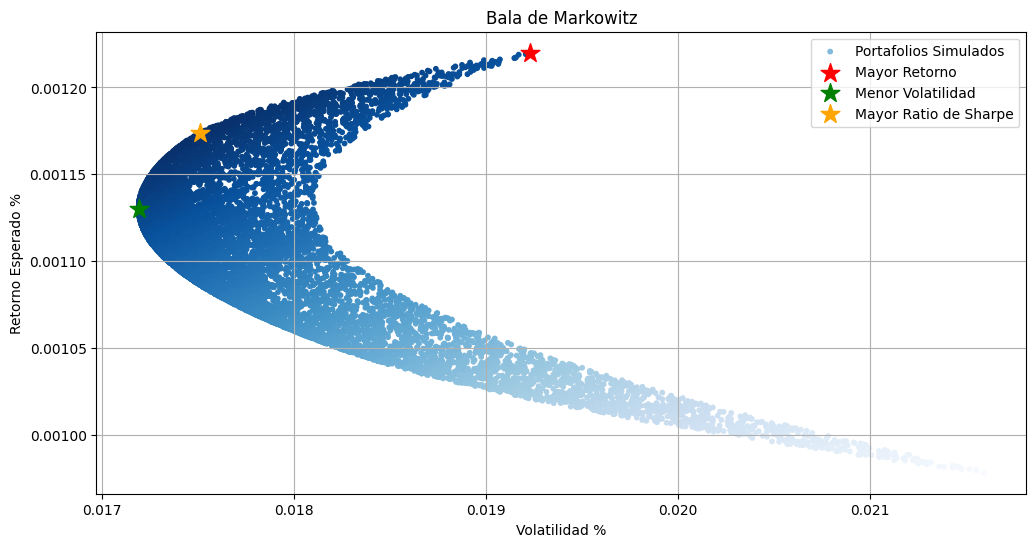

In [25]:
plt.figure(figsize=(12, 6))

# Scatter plot de todos los portafolios
plt.scatter(p_vol, p_returns, c=p_sharpe, cmap='Blues', marker='o', s=10, label = 'Portafolios Simulados')

# Portafolio de mayor retorno
plt.scatter(p_vol[ind_max_r], p_returns[ind_max_r], color='red', marker='*', s=200, label='Mayor Retorno')

# Portafolio de menor volatilidad
plt.scatter(p_vol[ind_min_v], p_returns[ind_min_v], color='green', marker='*', s=200, label='Menor Volatilidad')

# Portafolio de mayor ratio de Sharpe
plt.scatter(p_vol[ind_max_s], p_returns[ind_max_s], color='orange', marker='*', s=200, label='Mayor Ratio de Sharpe')

plt.title('Bala de Markowitz')
plt.xlabel('Volatilidad %')
plt.ylabel('Retorno Esperado %')
plt.legend()
plt.grid()
plt.show()